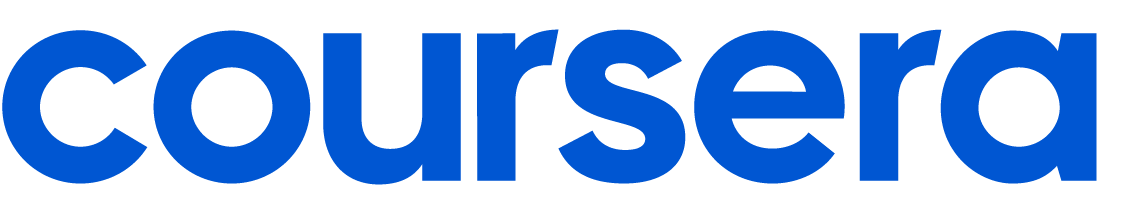

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [98]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [102]:
!pip install xgboost


     |████████████████████████████████| 255.9 MB 4.3 MB/s             
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [103]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
# Import any other packages you may want to use
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV  # for model selection and hyperparameters
# from imblearn.over_sampling import SMOTE

# to import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# To evaluate model accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score



## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [105]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [106]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055,221.104,Premium,Mailed check,No,Both,No,Mobile,36.758,63.531,10,Sci-Fi,2.176,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175,294.987,Basic,Credit card,Yes,Movies,No,Tablet,32.451,25.726,18,Action,3.479,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.107,883.786,Basic,Mailed check,Yes,Movies,No,Computer,7.395,57.364,23,Fantasy,4.239,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.264,232.440,Basic,Electronic check,No,TV Shows,No,Tablet,27.960,131.538,30,Drama,4.276,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953,966.325,Premium,Electronic check,Yes,TV Shows,No,TV,20.083,45.357,20,Comedy,3.616,4,Female,0,No,No,4LGYPK7VOL,0


In [107]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869,679.036,Premium,Mailed check,No,TV Shows,No,TV,29.126,122.274,42,Comedy,3.523,2,Male,23,No,No,O1W6BHP6RM
1,77,9.913,763.290,Basic,Electronic check,Yes,TV Shows,No,TV,36.874,57.093,43,Action,2.022,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019,75.095,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.602,140.414,14,Sci-Fi,4.806,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357,1351.452,Standard,Electronic check,No,Both,Yes,Tablet,35.586,177.002,14,Comedy,4.944,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406,1128.949,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.504,70.308,6,Drama,2.847,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [108]:
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000,243787.000,243787.000,243787.000,243787.000,243787.000,243787.000,243787.000,243787.000,243787.000
mean,60.084,12.491,750.741,20.502,92.264,24.504,3.003,4.504,12.019,0.181
std,34.285,4.328,523.073,11.244,50.505,14.421,1.155,2.873,7.193,0.385
min,1.000,4.990,4.991,1.000,5.001,0.000,1.000,0.000,0.000,0.000
25%,30.000,8.739,329.147,10.764,48.382,12.000,2.001,2.000,6.000,0.000
50%,60.000,12.496,649.878,20.523,92.250,24.000,3.002,4.000,12.000,0.000
75%,90.000,16.238,1089.317,30.219,135.908,37.000,4.002,7.000,18.000,0.000
max,119.000,19.990,2378.724,40.000,179.999,49.000,5.000,9.000,24.000,1.000


In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [110]:
train_df['Churn'].value_counts()

0    199605
1     44182
Name: Churn, dtype: int64

In [111]:
train_df['UserRating'].unique()

array([2.17649751, 3.47863229, 4.23882362, ..., 4.01221731, 2.13578882,
       1.42889572])

In [112]:
print('Lowest user rating:' ,train_df['UserRating'].min())
print('Highest user rating:' ,train_df['UserRating'].max())

Lowest user rating: 1.0000073778257992
Highest user rating: 4.999989412151972


In [113]:
numerical_columns = train_df.select_dtypes(include=['number']).columns
numerical_columns=numerical_columns.drop('Churn')
numerical_columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize'], dtype='object')

In [114]:
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns
categorical_columns=categorical_columns.drop('CustomerID')

In [115]:
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(train_df[col].value_counts())
    print()  # Add an empty line for better readability

Value counts for SubscriptionType:
Standard    81920
Basic       81050
Premium     80817
Name: SubscriptionType, dtype: int64

Value counts for PaymentMethod:
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: PaymentMethod, dtype: int64

Value counts for PaperlessBilling:
No     121980
Yes    121807
Name: PaperlessBilling, dtype: int64

Value counts for ContentType:
Both        81737
TV Shows    81145
Movies      80905
Name: ContentType, dtype: int64

Value counts for MultiDeviceAccess:
No     122035
Yes    121752
Name: MultiDeviceAccess, dtype: int64

Value counts for DeviceRegistered:
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: DeviceRegistered, dtype: int64

Value counts for GenrePreference:
Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: GenrePreference, dtype: int64

Value counts for Gender:
Female    121930
Male      121857
Name: Gender, dtype: 


Comparing Churn with SubscriptionType:
SubscriptionType  Basic  Premium  Standard
Churn                                     
0                 65122    67662     66821
1                 15928    13155     15099


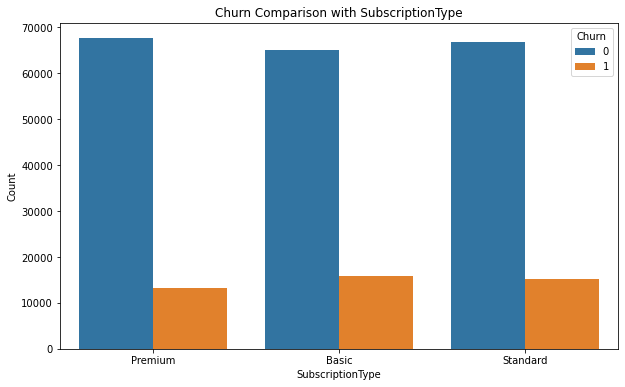

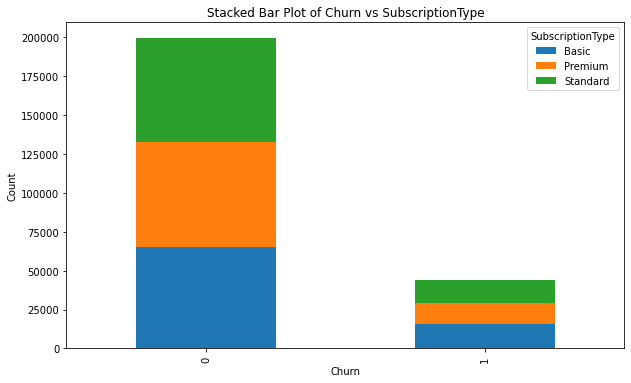

Chi-squared statistic: 318.45, p-value: 0.0000

Comparing Churn with PaymentMethod:
PaymentMethod  Bank transfer  Credit card  Electronic check  Mailed check
Churn                                                                    
0                      49898        51039             49512         49156
1                      10899         9885             11801         11597


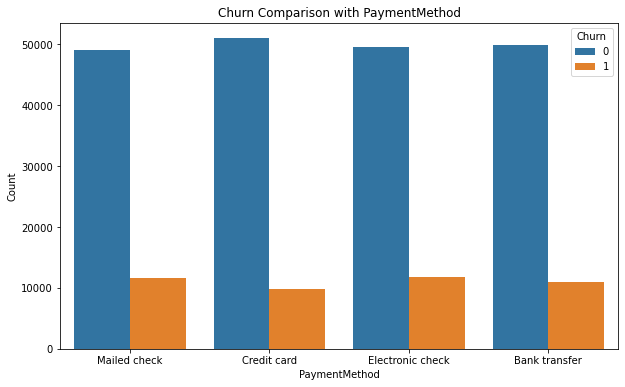

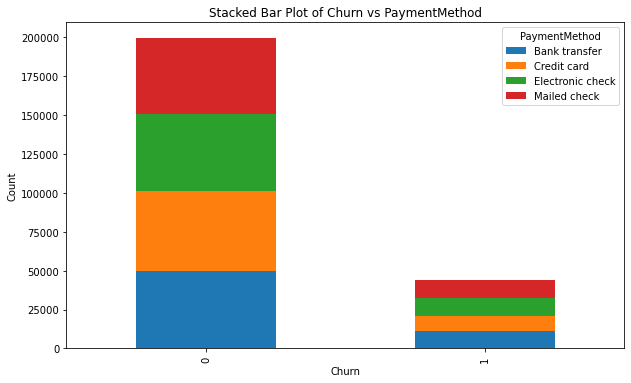

Chi-squared statistic: 239.86, p-value: 0.0000

Comparing Churn with PaperlessBilling:
PaperlessBilling     No    Yes
Churn                         
0                 99830  99775
1                 22150  22032


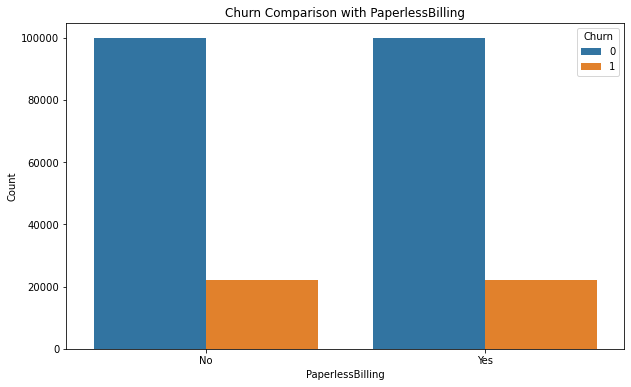

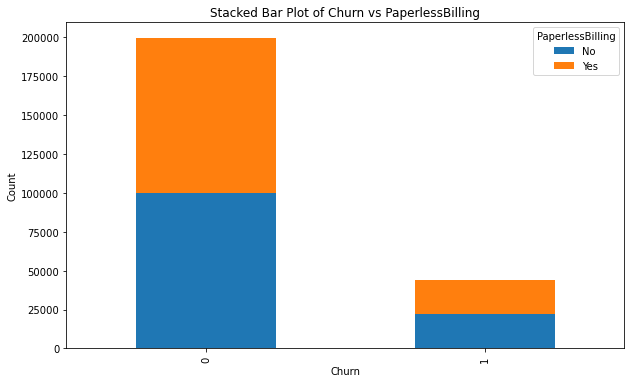

Chi-squared statistic: 0.20, p-value: 0.6525

Comparing Churn with ContentType:
ContentType   Both  Movies  TV Shows
Churn                               
0            66332   66523     66750
1            15405   14382     14395


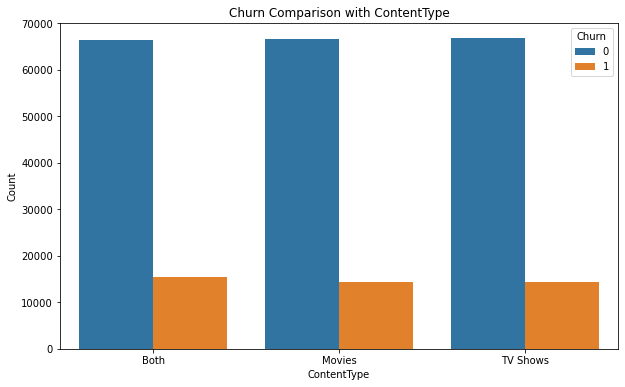

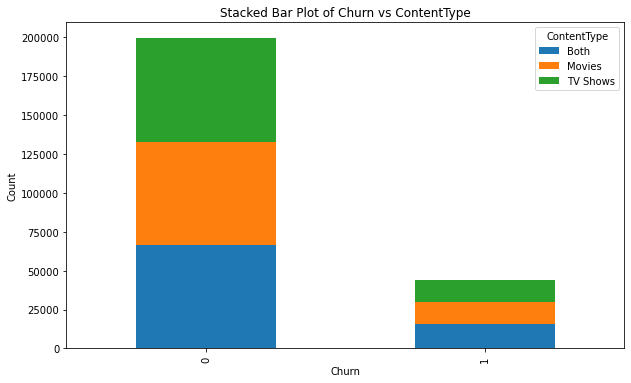

Chi-squared statistic: 43.45, p-value: 0.0000

Comparing Churn with MultiDeviceAccess:
MultiDeviceAccess     No    Yes
Churn                          
0                  99858  99747
1                  22177  22005


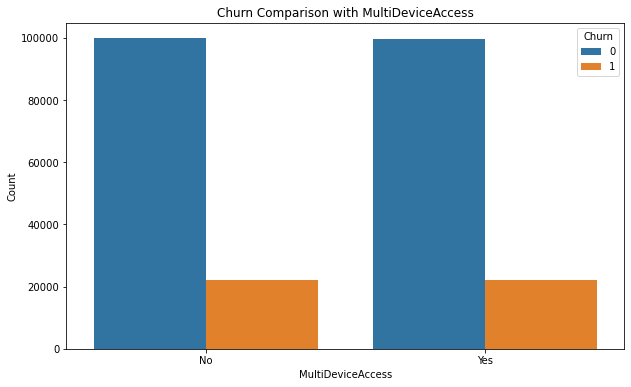

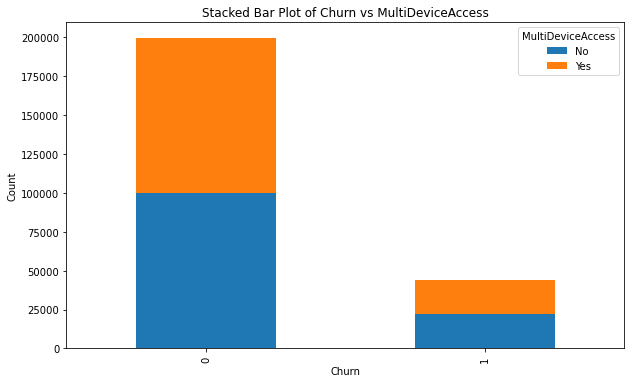

Chi-squared statistic: 0.40, p-value: 0.5291

Comparing Churn with DeviceRegistered:
DeviceRegistered  Computer  Mobile     TV  Tablet
Churn                                            
0                    50058   49805  49736   50006
1                    11089   11109  10847   11137


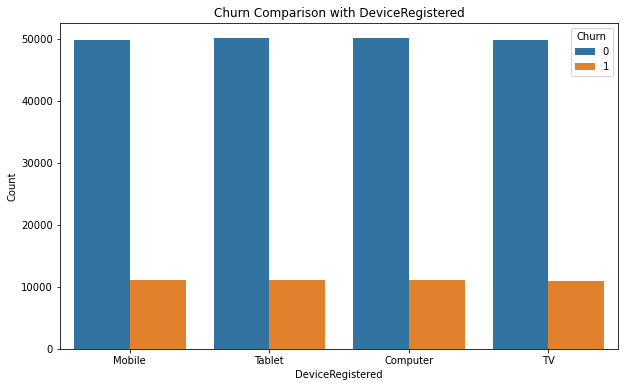

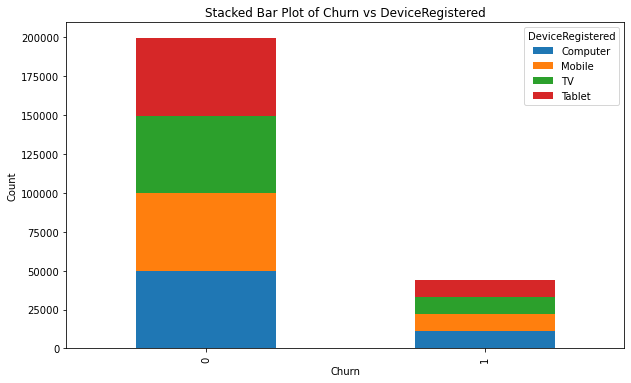

Chi-squared statistic: 2.84, p-value: 0.4171

Comparing Churn with GenrePreference:
GenrePreference  Action  Comedy  Drama  Fantasy  Sci-Fi
Churn                                                  
0                 40614   39571  40033    40303   39084
1                  8076    9489   8711     8652    9254


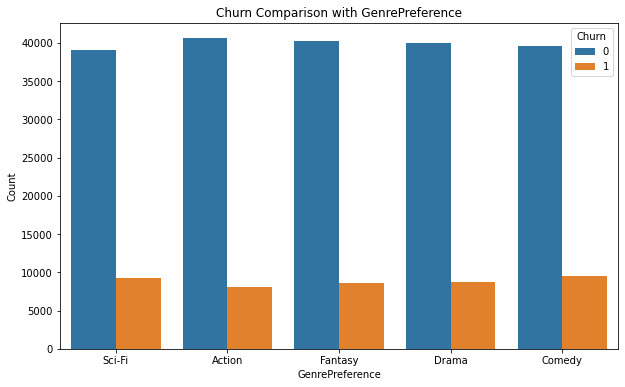

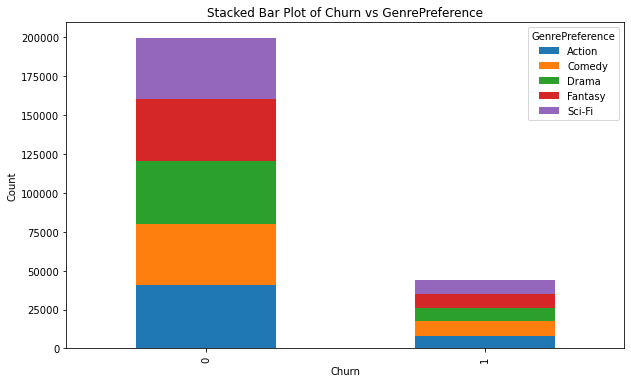

Chi-squared statistic: 169.30, p-value: 0.0000

Comparing Churn with Gender:
Gender  Female   Male
Churn                
0       100183  99422
1        21747  22435


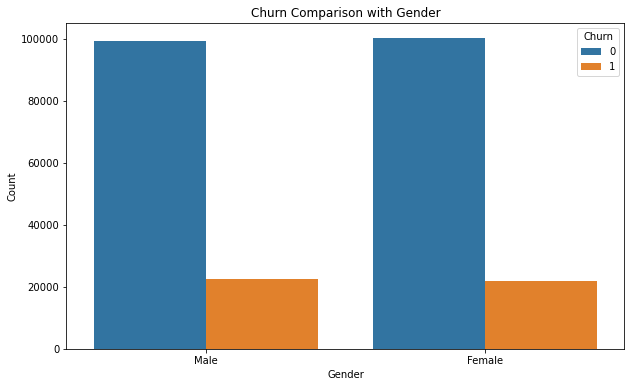

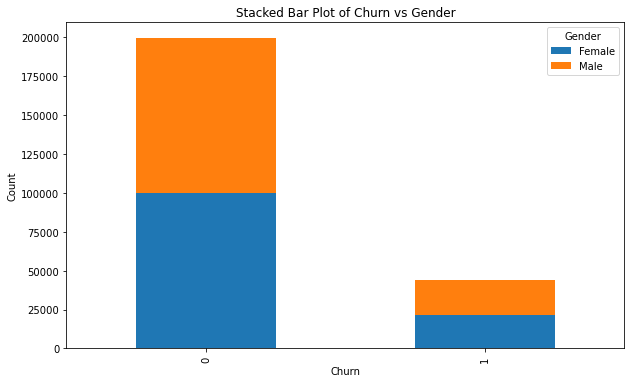

Chi-squared statistic: 13.55, p-value: 0.0002

Comparing Churn with ParentalControl:
ParentalControl     No     Yes
Churn                         
0                99386  100219
1                22316   21866


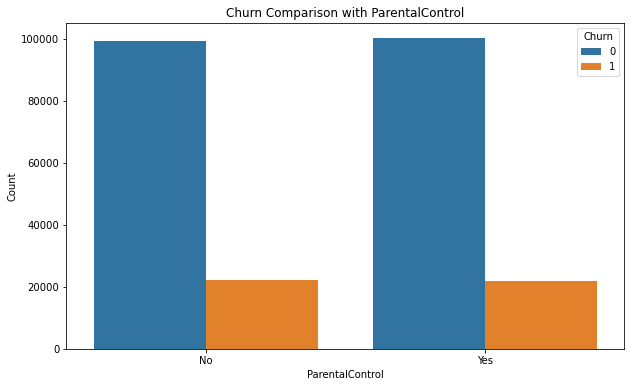

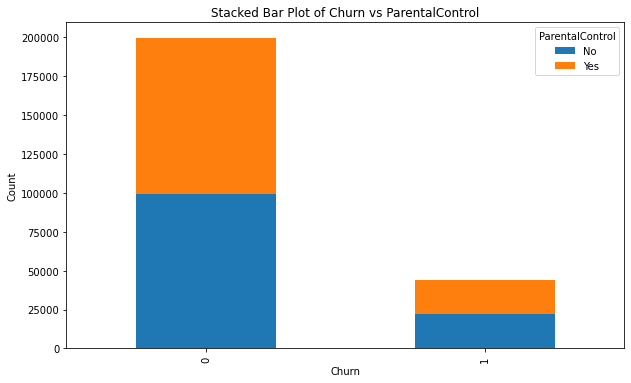

Chi-squared statistic: 7.43, p-value: 0.0064

Comparing Churn with SubtitlesEnabled:
SubtitlesEnabled     No     Yes
Churn                          
0                 98987  100618
1                 22620   21562


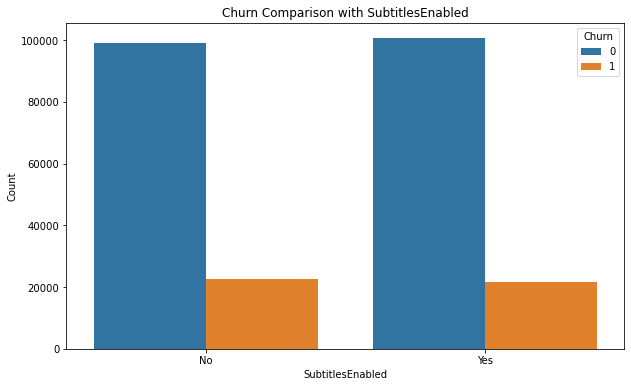

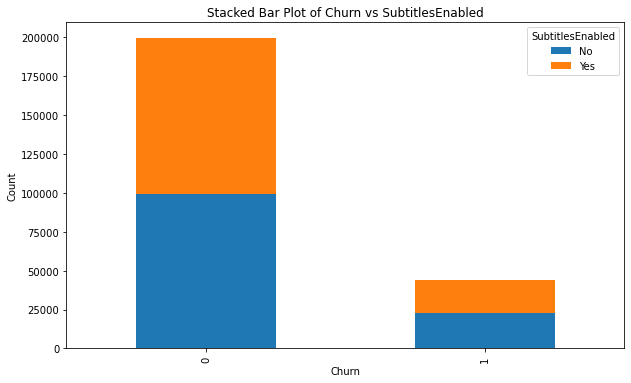

Chi-squared statistic: 37.25, p-value: 0.0000


In [116]:
for categorical_column in categorical_columns:
    print(f"\nComparing Churn with {categorical_column}:")

    # 1. Cross-tabulation
    crosstab = pd.crosstab(train_df['Churn'], train_df[categorical_column])
    print(crosstab)

    # 2. Bar plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=categorical_column, hue='Churn')
    plt.title(f'Churn Comparison with {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.show()

    # 3. Stacked Bar Plot
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Stacked Bar Plot of Churn vs {categorical_column}')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.legend(title=categorical_column)
    plt.show()

    # 4. Chi-Squared Test
    chi2, p, _, _ = chi2_contingency(crosstab)
    print(f'Chi-squared statistic: {chi2:.2f}, p-value: {p:.4f}')

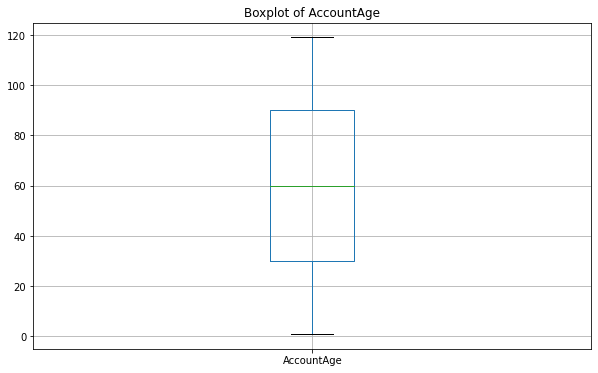

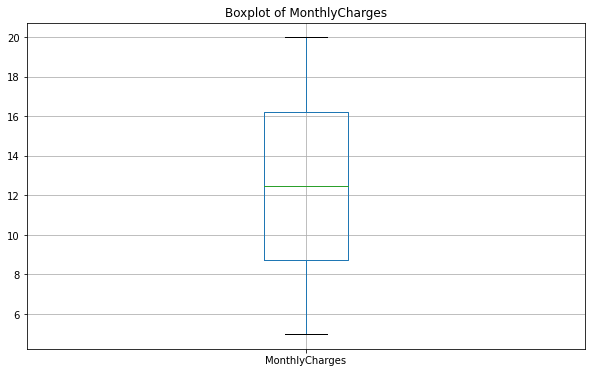

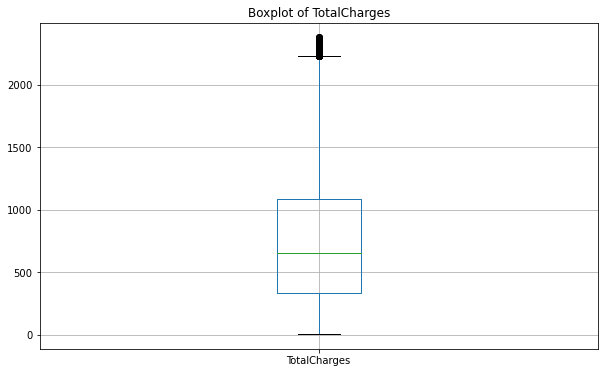

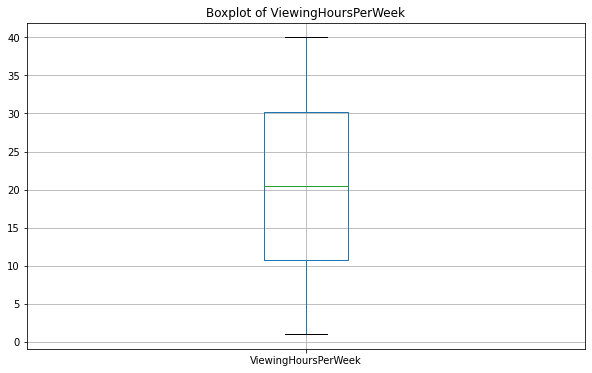

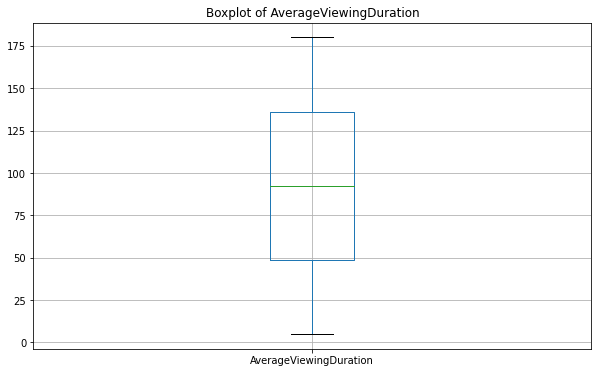

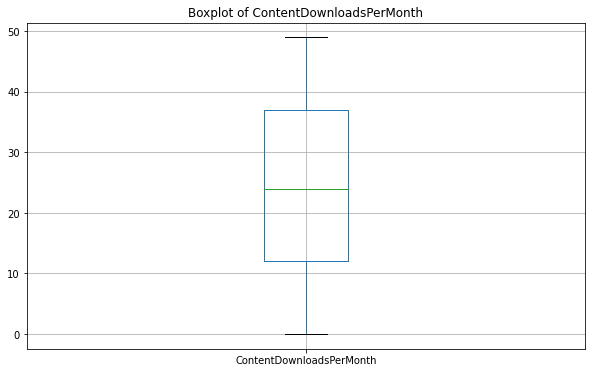

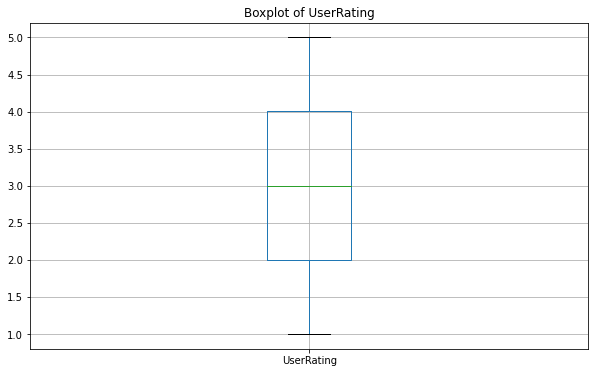

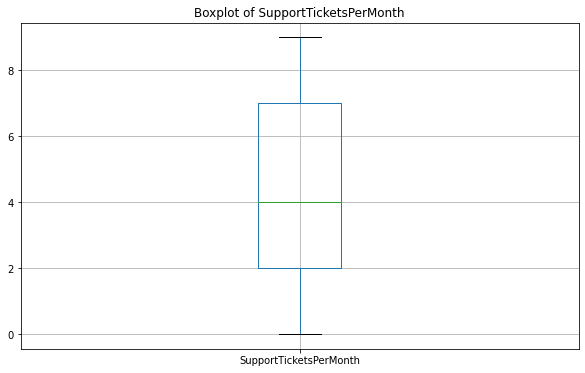

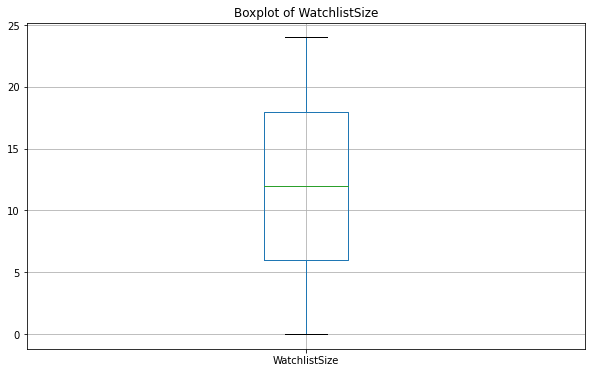

In [117]:
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(10, 6))  # Set the figure size
    train_df.boxplot(column=col)  # Create a boxplot for each column
    plt.title(f'Boxplot of {col}')  # Optional: Add a title
    plt.show()

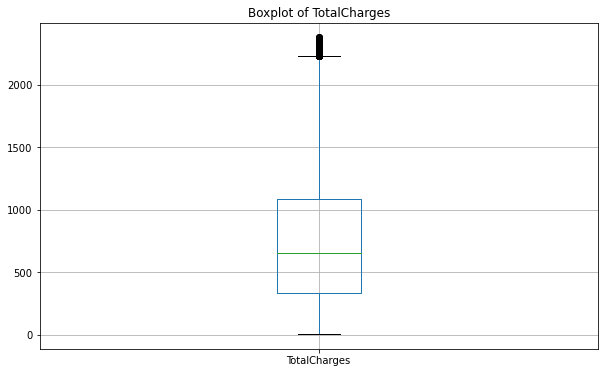

In [118]:
plt.figure(figsize=(10, 6))  # Set the figure size
train_df.boxplot(column='TotalCharges')  # Create a boxplot for each column
plt.title(f'Boxplot of TotalCharges')  # Optional: Add a title
plt.show()

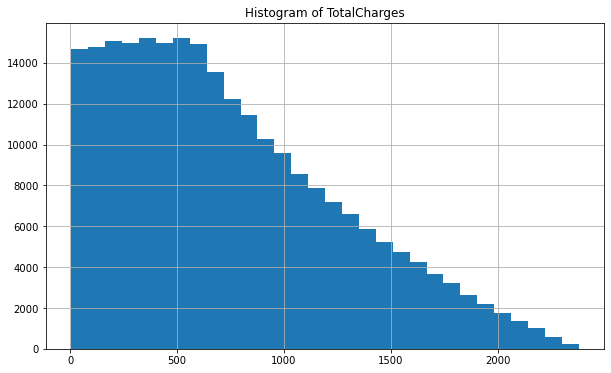

In [119]:
plt.figure(figsize=(10, 6))
train_df['TotalCharges'].hist(bins=30)
plt.title('Histogram of TotalCharges')
plt.show()

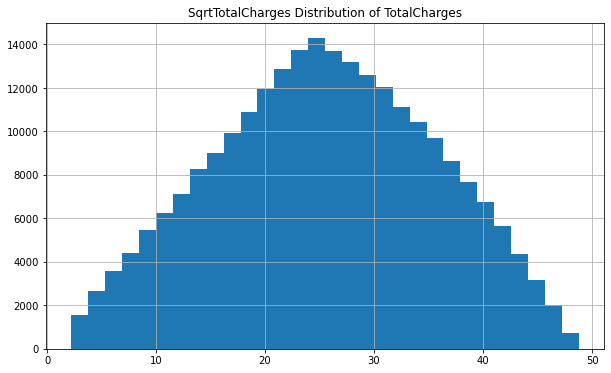

In [120]:
# train_df['LogTotalCharges'] = np.log1p(train_df['TotalCharges'])
train_df['SqrtTotalCharges'] = np.sqrt(train_df['TotalCharges'])

# Visualize the transformed data
plt.figure(figsize=(10, 6))
train_df['SqrtTotalCharges'].hist(bins=30)
plt.title('SqrtTotalCharges Distribution of TotalCharges')
plt.show()

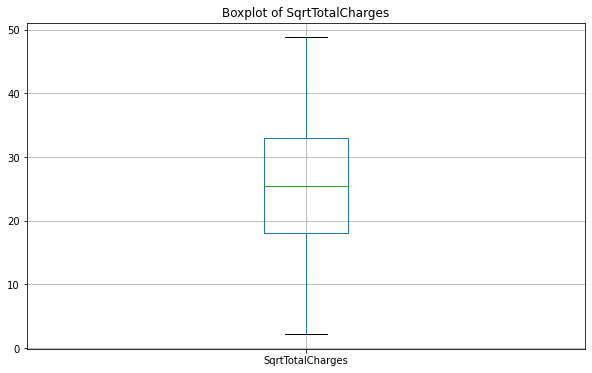

In [121]:
plt.figure(figsize=(10, 6))  
train_df.boxplot(column='SqrtTotalCharges')  
plt.title(f'Boxplot of SqrtTotalCharges')  
plt.show()

In [122]:
labeledtrain_df=train_df.copy()
labeledtrain_df.drop('TotalCharges', axis=1, inplace=True)
label_encoders = {}  # To store the encoders for each column

for column in categorical_columns:
    label_encoder = LabelEncoder()
    labeledtrain_df[column] = label_encoder.fit_transform(labeledtrain_df[column])
    label_encoders[column] = label_encoder

In [123]:
for column, encoder in label_encoders.items():
    print(f"\nColumn: {column}")
    for i, label in enumerate(encoder.classes_):
        print(f"Label: {label} => Code: {i}")


Column: SubscriptionType
Label: Basic => Code: 0
Label: Premium => Code: 1
Label: Standard => Code: 2

Column: PaymentMethod
Label: Bank transfer => Code: 0
Label: Credit card => Code: 1
Label: Electronic check => Code: 2
Label: Mailed check => Code: 3

Column: PaperlessBilling
Label: No => Code: 0
Label: Yes => Code: 1

Column: ContentType
Label: Both => Code: 0
Label: Movies => Code: 1
Label: TV Shows => Code: 2

Column: MultiDeviceAccess
Label: No => Code: 0
Label: Yes => Code: 1

Column: DeviceRegistered
Label: Computer => Code: 0
Label: Mobile => Code: 1
Label: TV => Code: 2
Label: Tablet => Code: 3

Column: GenrePreference
Label: Action => Code: 0
Label: Comedy => Code: 1
Label: Drama => Code: 2
Label: Fantasy => Code: 3
Label: Sci-Fi => Code: 4

Column: Gender
Label: Female => Code: 0
Label: Male => Code: 1

Column: ParentalControl
Label: No => Code: 0
Label: Yes => Code: 1

Column: SubtitlesEnabled
Label: No => Code: 0
Label: Yes => Code: 1


In [124]:
labeledtrain_df.head(10)

,AccountAge,MonthlyCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn,SqrtTotalCharges
0,20,11.055,1,3,0,0,0,1,36.758,63.531,10,4,2.176,4,1,3,0,0,CB6SXPNVZA,0,14.870
1,57,5.175,0,1,1,1,0,3,32.451,25.726,18,0,3.479,8,1,23,0,1,S7R2G87O09,0,17.175
2,73,12.107,0,3,1,1,0,0,7.395,57.364,23,3,4.239,6,1,1,1,1,EASDC20BDT,0,29.729
3,32,7.264,0,2,0,2,0,3,27.960,131.538,30,2,4.276,2,1,24,1,1,NPF69NT69N,0,15.246
4,57,16.953,1,2,1,2,0,2,20.083,45.357,20,1,3.616,4,0,0,0,0,4LGYPK7VOL,0,31.086
5,113,7.296,1,3,1,0,0,1,21.678,97.096,35,1,3.721,8,0,2,1,1,JY5HS0GWHW,0,28.713
6,38,12.341,1,0,0,0,0,0,36.513,81.783,28,0,4.091,9,0,20,0,1,79XSO6P5O3,0,21.655
7,25,7.248,2,2,1,2,0,2,16.356,154.522,10,3,3.410,2,0,22,0,0,2LDC9AQ3C5,0,13.461
8,26,19.803,2,0,0,1,0,3,8.203,94.375,28,3,2.680,0,1,5,1,1,74DURHL3Y8,1,22.691
9,14,18.843,2,0,0,1,0,0,38.561,122.013,0,1,2.993,0,1,18,0,0,CY8S2R3A1T,0,16.242


In [125]:
scaler = StandardScaler()

finaldf=labeledtrain_df.drop('CustomerID', axis=1)
X=finaldf.drop('Churn', axis=1)
Y=finaldf['Churn']
scaled_X = scaler.fit_transform(X)



In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y,stratify= Y, test_size=0.25, random_state=42)


In [ ]:
models =[LogisticRegression(max_iter=10000), RandomForestClassifier(random_state=42), KNeighborsClassifier(), SVC(kernel='linear')]

for model in models:
    cv_score=cross_val_score(model, scaled_X, Y, cv=5) # cv - splits data into 5 folds
    mean= round(sum(cv_score)/len(cv_score)*100, 2)
    
    print(model)
    print('cross validation accuracies', cv_score)
    print('accuracy score', mean)
    print('**************************************************************************************')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
cross validation accuracies [0.82425448 0.82382378 0.82392272 0.82398425 0.82187173]
accuracy score 82.36
**************************************************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, ran

In [127]:
rfc=RandomForestClassifier(random_state=42, n_estimators=50)

In [129]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [130]:
prediction = rfc.predict(X_test)

In [131]:
accuracy = accuracy_score(Y_test, prediction)
print('accuracy', accuracy)

accuracy 0.82118890183274


In [135]:
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)


In [136]:
xgb_classifier.fit(X_train, Y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(Y_test, y_pred)
xgb_accuracy

0.822435886918142

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

In [140]:
test_df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating', 'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID'], dtype='object')

In [142]:
testdf=test_df.copy()
testdf_X=testdf.drop('CustomerID', axis=1)
for column in categorical_columns:
    label_encoder = LabelEncoder()
    testdf_X[column] = label_encoder.fit_transform(testdf_X[column])
scaledtest_X = scaler.fit_transform(testdf_X)

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [146]:
predicted_probability = xgb_classifier.predict(scaledtest_X)

In [147]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [148]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0
1,LFR4X92X8H,0
2,QM5GBIYODA,1
3,D9RXTK2K9F,0
4,ENTCCHR1LR,0
5,7A88BB5IO6,0
6,70OMW9XEWR,0
7,EL1RMFMPYL,0
8,4IA2QPT6ZK,0
9,AEDCWHSJDN,0


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [149]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [150]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [151]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [152]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [153]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!